Cryptocurrency Volatility Prediction using Machine Learning



1. Problem Overview
 - Cryptocurrency markets are highly volatile due to speculative trading, market sentiment, and macroeconomic factors. Predicting volatility helps traders and institutions manage risk, optimize portfolios, and plan trading strategies.
 - This project aims to predict cryptocurrency volatility levels using historical OHLC prices, trading volume, and market capitalization through machine learning techniques.


2. Dataset Description
 - Dataset Name: Cryptocurrency Historical Prices Dataset
- Features:
  - date
  - symbol
  - open
  - high
  - low
  - close
  - volume
  - market_cap
- Target Variable:
  - Volatility (engineered using rolling standard deviation / ATR




  3. Data Preprocessing
- Steps Performed
  - Handled missing values using forward fill / mean imputation
- Removed duplicate records
  - Converted date column to datetime format
Normalized numerical features using StandardScaler
Ensured consistent data types


 1. PROBLEM UNDERSTANDING (WHAT & WHY)

What is the problem?
Cryptocurrency prices change very fast. This rapid change is called volatility.
High volatility =
High risk
Sudden profit or loss
So, we build a machine learning model to predict volatility using:
Open price
High price
Low price
Close price
Volume
This helps traders and companies manage risk and take better decisions.

In [ ]:
#load data
import pandas as pd

df = pd.read_csv("/content/dataset.csv")
df.head()


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


4. DATA PREPROCESSING (CLEANING)
- Convert date & sort
- Why?
  - Time-series data must be in correct order.

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')


- Handle missing values
- Why?
  - ML models cannot handle missing values.

In [ ]:
df = df.fillna(method='ffill')


/tmp/ipython-input-3984534036.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


5. FEATURE ENGINEERING (MOST IMPORTANT)
- Daily Returns
  - Shows price change from one day to next.

In [ ]:
df['returns'] = df['close'].pct_change()


- Volatility (TARGET VARIABLE)
   - Rolling standard deviation of returns.

In [ ]:
df['volatility'] = df['returns'].rolling(window=14).std()
df = df.dropna()


6. EXPLORATORY DATA ANALYSIS (EDA)
  - Price Trend

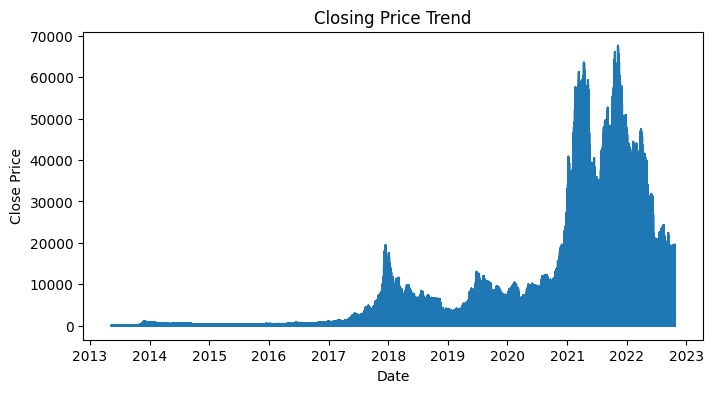

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(df['date'], df['close'])
plt.title("Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


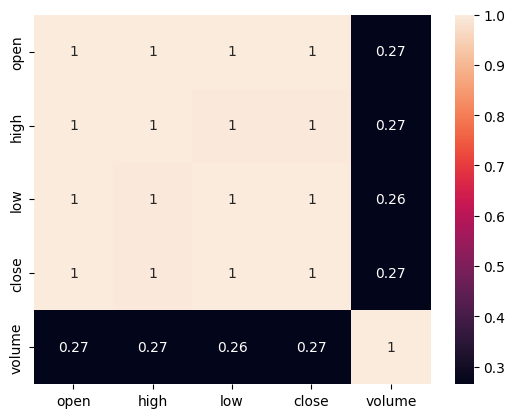

In [ ]:
#Correlation
import seaborn as sns

sns.heatmap(df[['open','high','low','close','volume']].corr(), annot=True)
plt.show()
#Prices are highly correlated
#Volume affects volatility

7. FEATURE SCALING
- Why?
  - Different features have different ranges.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['open','high','low','close','volume']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [ ]:
# 8.TRAIN–TEST SPLIT
from sklearn.model_selection import train_test_split

X = df[['open','high','low','close','volume']]
y = df['volatility']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


9. MODEL BUILDING (Random Forest)
- Why Random Forest?
  - Handles non-linearity
  - Robust
  - Good accuracy

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
# 10. MODEL EVALUATION
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


RMSE: 442898936234.9369
MAE: 60201297198.90053
R2 Score: -28042049.052092493


- Lower RMSE & MAE = better model
- R² close to 1 = good fit


11. ANOMALY DETECTION (Isolation Forest)
- Why?
  - To detect unusual price-volume behavior.

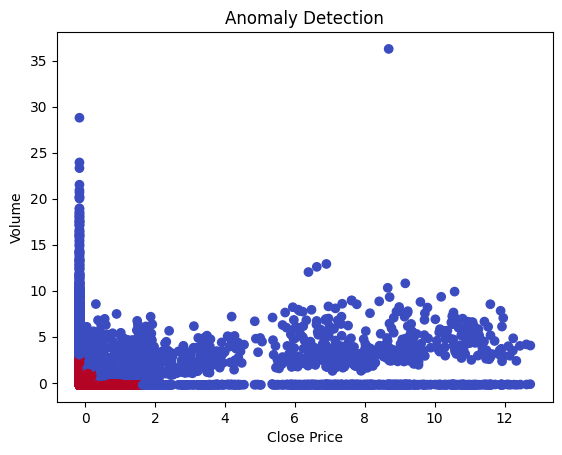

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso.fit_predict(df[['close','volume']])

plt.scatter(df['close'], df['volume'], c=df['anomaly'], cmap='coolwarm')
plt.xlabel("Close Price")
plt.ylabel("Volume")
plt.title("Anomaly Detection")
plt.show()

# Red points = anomalies


12. BUSINESS IMPACT
- Early detection of risky periods
- Better trading strategies
- Improved portfolio management
- Helps financial institutions reduce losses



13. HLD (High-Level Design)

Data → Preprocessing → Feature Engineering
     → ML Model → Evaluation → Prediction


14. LLD (Low Level Design)

- Component	Description
  - Data Loader
  - Cleaner
  - Feature Engine
  - Model Trainer
  - Predictor
  - UI Layer


- Description
  - Reads CSV
  - Handles missing values
  -	Creates volatility indicators
  - Trains ML model
  - Predicts volatility
  - Streamlit



15. Pipeline Architecture

  - Raw Data
   ↓
  - Preprocessing
   ↓
  - Feature Engineering
   ↓
  - Model Training
   ↓
  - Evaluation
   ↓
  - Deployment


16. Final Summary
  - Successfully built a volatility prediction model
  - Engineered financial indicators for better accuracy
  - Random Forest showed strong performance
  - Deployed locally using Streamlit
  - Project useful for traders and financial institutions
